## Assignment :
              ttest and its types
## Submitted by:
            M.Mohsin ur Rehman
## Submitted to:
            Dr. Muhammad Ammar Tufail(baba g)            

# Parametric Statistical Hypotheses Tests

**_1. Student's t-test_**

Student’s t-test(by William Sealy Gosset), in statistics, a method of testing hypotheses

about the mean of a small sample drawn from a normally distributed

population when the population standard deviation is unknown.

**Assumptions**

Observations in each sample are independent and identically distributed(iid)\

**Interpretation**

H0=means samples are equal

H1= means samples are unequal

# Types:

    There are two types of ttest

    1.One sample ttest

    2.two sample ttest

       a.Independent(unpaired)
       
       b.Paired


In [61]:
#Importing libraries

import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats

In [62]:
#Loading dataset of Indian crops's yield 
df=pd.read_csv("District_Level_Data.csv")
df.head()


,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1978,14,Chhattisgarh,Durg,612.5,362.2,591.35,48.7,25.6,...,2000.0,0.0,0.0,0.0,4.75,8.67,13.41,0.04,0.43,0.34
1,1,1979,14,Chhattisgarh,Durg,616.8,330.6,535.99,44.6,17.8,...,1000.0,0.0,0.0,0.0,4.76,8.62,13.38,0.06,0.48,0.28
2,1,1980,14,Chhattisgarh,Durg,634.9,515.6,812.10,44.1,33.6,...,1000.0,0.0,0.0,0.0,4.66,9.57,14.24,0.07,0.47,0.21
3,1,1981,14,Chhattisgarh,Durg,630.0,506.9,804.60,41.5,23.6,...,1000.0,0.0,0.0,0.0,4.66,9.55,14.21,0.05,0.51,0.27
4,1,1982,14,Chhattisgarh,Durg,627.9,513.3,817.49,41.1,23.9,...,2000.0,0.0,0.0,0.0,4.70,10.00,14.70,0.08,0.38,0.21


In [63]:
#subsetting
df.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [64]:
# Selecting columns
df=df[["State Name","RICE YIELD (Kg per ha)","WHEAT YIELD (Kg per ha)"]]
df

,State Name,RICE YIELD (Kg per ha),WHEAT YIELD (Kg per ha)
0,Chhattisgarh,591.35,525.67
1,Chhattisgarh,535.99,399.10
2,Chhattisgarh,812.10,761.90
3,Chhattisgarh,804.60,568.67
4,Chhattisgarh,817.49,581.51
...,...,...,...
12413,Jharkhand,2170.67,1209.15
12414,Jharkhand,2288.57,1240.67
12415,Jharkhand,1005.70,914.57
12416,Jharkhand,1423.84,2167.98


In [65]:
# Check null values
df.isnull().sum()

State Name                 0
RICE YIELD (Kg per ha)     0
WHEAT YIELD (Kg per ha)    0
dtype: int64

In [66]:
# shape
df.shape

(12418, 3)

In [67]:
# Descibe
df.describe()

,RICE YIELD (Kg per ha),WHEAT YIELD (Kg per ha)
count,12418.000000,12418.000000
mean,1636.636947,1662.473753
std,990.500973,1129.212843
min,-1.000000,-1.000000
25%,926.472500,929.885000
50%,1539.035000,1562.035000
75%,2297.180000,2375.835000
max,5653.830000,5541.520000


<AxesSubplot:xlabel='WHEAT YIELD (Kg per ha)', ylabel='Count'>

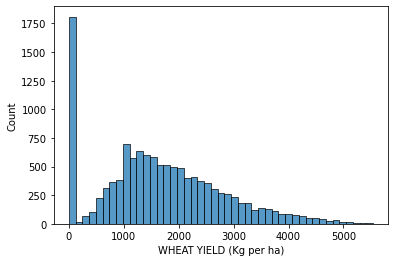

In [68]:
# check Normality by visualization
# Histogram
sns.histplot(df["WHEAT YIELD (Kg per ha)"])

<AxesSubplot:xlabel='RICE YIELD (Kg per ha)', ylabel='Count'>

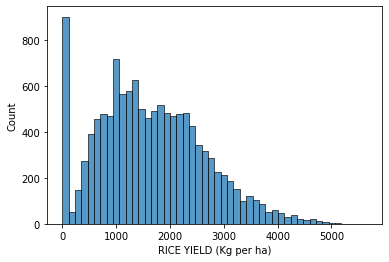

In [69]:
sns.histplot(df["RICE YIELD (Kg per ha)"])

In [103]:
# check normality by statistical test
# shapiro wilk test
# import library
from scipy.stats import shapiro

In [71]:
# Shapiro wilk test
stat,p=shapiro(df["RICE YIELD (Kg per ha)"])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal")  

stat=0.978
p=0.000
data is not normal


C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [72]:
# Using log-transformation test to normalize data
df["RICE YIELD (Kg per ha)"]=np.log(df["RICE YIELD (Kg per ha)"])
# df=df.rename(columns={"RICE YIELD (Kg per ha)":"log(RICE YIELD (Kg per ha))"})

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
#Updating column name
df.rename(columns={"RICE YIELD (Kg per ha)":"log(RICE YIELD (Kg per ha))"}, inplace=True)

In [74]:
# Again shapiro wilk test
stat,p=shapiro(df["log(RICE YIELD (Kg per ha))"])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)

if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal")

stat=nan
p=1.000
data is normal


C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [75]:
# checking normality of other column
stat,p=shapiro(df["WHEAT YIELD (Kg per ha)"])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal") 

stat=0.964
p=0.000
data is not normal


In [76]:
# Using log-transformation test to normalize data
df["WHEAT YIELD (Kg per ha)"] = np.log(df["WHEAT YIELD (Kg per ha)"])
df

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,State Name,log(RICE YIELD (Kg per ha)),WHEAT YIELD (Kg per ha)
0,Chhattisgarh,6.382408,6.264674
1,Chhattisgarh,6.284116,5.989212
2,Chhattisgarh,6.699623,6.635815
3,Chhattisgarh,6.690345,6.343300
4,Chhattisgarh,6.706239,6.365628
...,...,...,...
12413,Jharkhand,7.682791,7.097673
12414,Jharkhand,7.735682,7.123407
12415,Jharkhand,6.913439,6.818454
12416,Jharkhand,7.261113,7.681551


In [77]:
#Updating column name
df.rename(columns={"WHEAT YIELD (Kg per ha)":"log(WHEAT YIELD (Kg per ha))"}, inplace=True)

In [79]:
# Again shapiro wilk test
stat,p=shapiro(df["log(WHEAT YIELD (Kg per ha))"])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)

if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal")

stat=nan
p=1.000
data is normal


C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
df.head()

,State Name,log(RICE YIELD (Kg per ha)),log(WHEAT YIELD (Kg per ha))
0,Chhattisgarh,6.382408,6.264674
1,Chhattisgarh,6.284116,5.989212
2,Chhattisgarh,6.699623,6.635815
3,Chhattisgarh,6.690345,6.343300
4,Chhattisgarh,6.706239,6.365628


In [81]:
# Now we move forward
# Apply parametric test
# ttest
## 1-sample ttest

from scipy.stats import ttest_1samp
stat,p=ttest_1samp(df['log(WHEAT YIELD (Kg per ha))'],2)
print("stat=",stat)
print("p=",p)

if  p > 0.05: 
    print("probably same distribution")
else:
    print("probably different distribution") 

stat= nan
p= nan
probably different distribution


In [82]:
df.head()

,State Name,log(RICE YIELD (Kg per ha)),log(WHEAT YIELD (Kg per ha))
0,Chhattisgarh,6.382408,6.264674
1,Chhattisgarh,6.284116,5.989212
2,Chhattisgarh,6.699623,6.635815
3,Chhattisgarh,6.690345,6.343300
4,Chhattisgarh,6.706239,6.365628


In [84]:
df["State Name"].unique()

array(['Chhattisgarh', 'Madhya Pradesh', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Tamil Nadu', 'Maharashtra', 'Gujarat', 'Rajasthan',
       'Punjab', 'Haryana', 'Uttar Pradesh', 'Uttarakhand', 'Assam',
       'Himachal Pradesh', 'Kerala', 'Orissa', 'West Bengal', 'Bihar',
       'Jharkhand'], dtype=object)

In [92]:
# 2-sample ttest (independent)

from scipy.stats import ttest_ind
df_punjab=df[df["State Name"]=="Punjab"]
df_UttarPradesh=df[df["State Name"]=="Uttar Pradesh"]
stat,p=ttest_ind(df_punjab["log(RICE YIELD (Kg per ha))"],df_UttarPradesh["log(RICE YIELD (Kg per ha))"])
print("stat=",stat)
print("p=",p)

if  p > 0.05: 
    print("no significant diffrence")
else:
    print("significance difference") 


stat= 31.08268008417318
p= 3.962979971775452e-177
significance difference


In [102]:
# Now 2-sample(paired ttest)
# First we do equal the length of both groups

from scipy.stats import ttest_rel

df_punjab_eq=df_punjab.sample(n=100)
df_UttarPradesh_eq=df_UttarPradesh.sample(n=100)

stat,p=ttest_rel(df_punjab_eq["log(WHEAT YIELD (Kg per ha))"],df_UttarPradesh_eq["log(WHEAT YIELD (Kg per ha))"])
print("stat=",stat)
print("p=",p)

if  p > 0.05: 
    print("no significant diffrence")
else:
    print("significant difference") 

stat= 10.63496935837545
p= 4.52682288998079e-18
significant difference
